In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Aquisição dos dados

In [2]:
# Importar dados de arquivo csv, onde o separador de campos é '.' e o separador de casas decimais é ','
df = pd.read_csv('dados/dados_isolador40.csv', sep=';', decimal=',')

#### Análise exploratória dos dados

In [3]:
# 5 primeiros registros do dataframe
df.head()

,umidade,temperatura,pressao,vento_ang,vent_veloc,chuva,corrente_fuga
0,70,29.6,1016,278,1.4,0,0.024992
1,69,29.7,1016,297,1.4,0,0.022767
2,70,29.8,1016,273,1.6,0,0.022607
3,68,29.8,1016,243,2.6,0,0.022426
4,68,29.7,1016,257,2.8,0,0.031797


In [4]:
# Formato do dataframe (registros/colunas)
df.shape

(40316, 7)

In [5]:
# Informações estatísticas do dataframe
df.describe()
# Notamos que existem atributos com valor mínimo igual a zero.

,umidade,temperatura,pressao,vento_ang,vent_veloc,chuva,corrente_fuga
count,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000
mean,80.507069,27.179539,1013.934195,179.871738,1.433518,0.348274,0.036329
std,12.887528,3.133381,3.576448,99.311229,1.330448,2.700848,0.002511
min,34.000000,18.600000,1006.000000,0.000000,0.000000,0.000000,0.022426
25%,71.000000,25.200000,1011.000000,75.000000,0.000000,0.000000,0.035073
50%,85.000000,26.700000,1013.000000,210.000000,1.400000,0.000000,0.036337
75%,91.000000,29.200000,1017.000000,265.000000,2.400000,0.000000,0.037321
max,98.000000,37.400000,1022.000000,357.000000,11.900000,100.000000,0.105487


In [6]:
# Verificando se existem valores nulos/missing
df.isnull().values.any()

False

In [7]:
# Verificando a quantidade de registros nulos
df.isnull().sum()

umidade          0
temperatura      0
pressao          0
vento_ang        0
vent_veloc       0
chuva            0
corrente_fuga    0
dtype: int64

In [8]:
# Verificando a quantidade de registros com valor zero em cada atributo.
(df == 0).sum()
# Devido à quantidade de valores zerados no atributo chuva, em relação ao total de registros,
# verificar se o atributo exerce alguma influência no modelo.

umidade              0
temperatura          0
pressao              0
vento_ang           92
vent_veloc       14511
chuva            38064
corrente_fuga        0
dtype: int64

In [9]:
# Plotando a correlação entre os atributos
df.corr().style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,umidade,temperatura,pressao,vento_ang,vent_veloc,chuva,corrente_fuga
umidade,1.0,-0.44157,-0.20368,0.32259,-0.50396,0.11214,0.69658
temperatura,-0.44157,1.0,-0.39874,-0.43925,0.45762,-0.11037,-0.34919
pressao,-0.20368,-0.39874,1.0,-0.011539,-0.045943,0.044076,-0.064254
vento_ang,0.32259,-0.43925,-0.011539,1.0,-0.34307,0.0424,0.22667
vent_veloc,-0.50396,0.45762,-0.045943,-0.34307,1.0,-0.0043842,-0.3078
chuva,0.11214,-0.11037,0.044076,0.0424,-0.0043842,1.0,0.29679
corrente_fuga,0.69658,-0.34919,-0.064254,0.22667,-0.3078,0.29679,1.0


In [10]:
# Correlação da corrente de fuga com os demais atributos.
df.corr()['corrente_fuga']
# Verificamos que a pressão possui uma correlação muito baixa, verificar se faz alguma diferença no modelo.

umidade          0.696576
temperatura     -0.349192
pressao         -0.064254
vento_ang        0.226674
vent_veloc      -0.307804
chuva            0.296792
corrente_fuga    1.000000
Name: corrente_fuga, dtype: float64

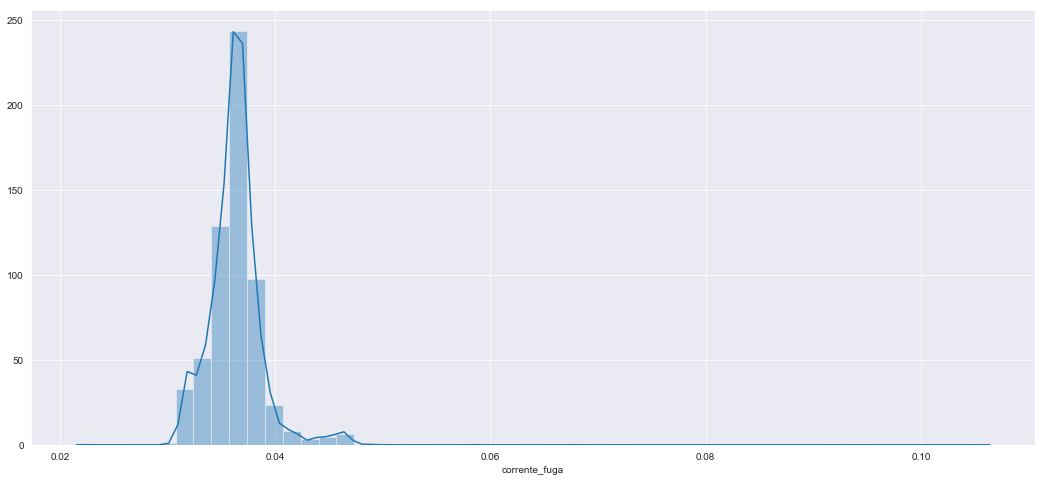

In [11]:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.distplot(df.corrente_fuga);
# A distribuição da corrente de fuga segue uma distribuição normal.

#### Preparação dos dados para o modelo

Apesar do atributo chuva possuir muitos registros com valor zero, e da baixa correlação da pressão, os dois atributos serão mantidos para a criação do modelo base.

In [12]:
# Excluindo a variável target 'corrente_fuga'.
cols = df.columns.drop(['corrente_fuga'])
cols

Index(['umidade', 'temperatura', 'pressao', 'vento_ang', 'vent_veloc',
       'chuva'],
      dtype='object')

In [13]:
# 80% dos dados para treino e 20% para teste.
# O parâmetro 'random_state' (semente aleatória) garante que os resultados sejam repetíveis em qualquer máquina.
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['corrente_fuga'], test_size=0.20, random_state=42)

#### Criando os modelos de machine learning

##### 01. Regressão Linear

In [14]:
lr = LinearRegression()

In [15]:
# Treinando o modelo.
model_lr = lr.fit(X_train, y_train)
# Realizando a predição com os dados de teste.
result_lr = model_lr.predict(X_test)

Calculando o erro e computando o score para os dados de teste:

In [16]:
# MSE: média do erro quadrado. Quanto menor o valor, mais acertivo é o modelo.
mse_lr = mean_squared_error(y_test, result_lr)
# RMSE: raiz quadrada do MSE (facilita a visualização do valor).
rmse_lr = (np.sqrt(mse_lr))
# A métrica score varia entre 0 e 1, e indica percentualmente o quanto o modelo consegue explicar os valores observados.
# Quanto maior o valor mais explicativo é o modelo.
score_lr = model_lr.score(X_test, y_test)
print('Resultados do erro médio e score (acurácia do modelo) para o dataset de teste:\n  MSE: {}'.format(mse_lr) 
      + '\n RMSE: {}'.format(rmse_lr) 
      + '\nScore: {:2.3f}'.format(score_lr * 100) + '%')

Resultados do erro médio e score (acurácia do modelo) para o dataset de teste:
  MSE: 2.403077793817954e-06
 RMSE: 0.001550186373897653
Score: 58.168%


###### 02. Árvore de Decisão

In [17]:
tree = DecisionTreeRegressor()

In [18]:
model_tree = tree.fit(X_train, y_train)
result_tree = tree.predict(X_test)

In [19]:
mse_tree = mean_squared_error(y_test, result_tree)
rmse_tree = (np.sqrt(mse_tree))
score_tree = model_tree.score(X_test, y_test)
print('Resultados do erro médio e score (acurácia do modelo) para o dataset de treino:\n  MSE: {}'.format(mse_tree) 
      + '\n RMSE: {}'.format(rmse_tree) 
      + '\nScore: {:2.3f}'.format(score_tree * 100) + '%')

Resultados do erro médio e score (acurácia do modelo) para o dataset de treino:
  MSE: 1.2795183243996382e-06
 RMSE: 0.001131157957316147
Score: 77.727%


##### 03. Random Forest

In [20]:
tree_rf = RandomForestRegressor()

In [21]:
model_rf = tree_rf.fit(X_train, y_train)
result_rf = model_rf.predict(X_test)

In [22]:
mse_rf = mean_squared_error(y_test, result_rf)
rmse_rf = (np.sqrt(mse_rf))
score_rf = model_rf.score(X_test, y_test)
print('Resultados do erro médio e score (acurácia do modelo) para o dataset de treino:\n  MSE: {}'.format(mse_rf) 
      + '\n RMSE: {}'.format(rmse_rf) 
      + '\nScore: {:2.3f}'.format(score_rf * 100) + '%')

Resultados do erro médio e score (acurácia do modelo) para o dataset de treino:
  MSE: 7.65231778903489e-07
 RMSE: 0.0008747752733722468
Score: 86.679%


##### 04. Random Forest com ajustes nos hiperparâmetros

In [23]:
param = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}
rf = RandomForestRegressor()
grid = GridSearchCV(rf, param)

In [24]:
# Executando o grid
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [1, 10], 'min_samples_split': [2, 10], 'n_estimators': [100, 250, 500, 750]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
# Verificando os melhores parâmetros
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}

In [26]:
rf_best = grid.best_estimator_

In [27]:
result_grid = rf_best.predict(X_test)

In [28]:
mse_grid = mean_squared_error(y_test, result_grid)
rmse_grid = (np.sqrt(mse_grid))
score_grid = rf_best.score(X_test, y_test)
print('Resultados do erro médio e score (acurácia do modelo) para o dataset de treino:\n  MSE: {}'.format(mse_grid) 
      + '\n RMSE: {}'.format(rmse_grid) 
      + '\nScore: {:2.3f}'.format(score_grid * 100) + '%')

Resultados do erro médio e score (acurácia do modelo) para o dataset de treino:
  MSE: 5.471601782843344e-07
 RMSE: 0.0007397027634694455
Score: 90.475%


##### Comparando os scores

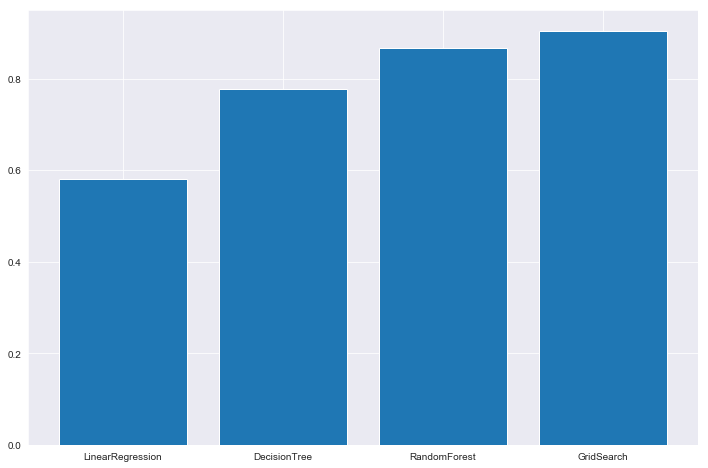

In [29]:
scores = [score_lr, score_tree, score_rf, score_grid]
labels = ['LinearRegression', 'DecisionTree', 'RandomForest', 'GridSearch']
plt.figure(figsize=(12,8))
plt.bar(labels, scores)

plt.show()